In [3]:
from annoy import AnnoyIndex
import pandas as pd
import numpy as np
import cv2
import sys  
import matplotlib.pyplot as plt
from bot.utils.color_extractor import ColorFeaturesExtractor
from bot.utils.BOVW_extractor import BOVWFeaturesExtractor
from bot.utils.retriever import Retriever
from bot.utils.utils import get_names_from_indexes



# Create indexes

In [ ]:
def create_index(df?path, retrieval_mode, metric)

In [30]:
# extract feature from input img
img_path = './test_imgs/high_heels.png'
img = cv2.imread(img_path)
cfe = BOVWFeaturesExtractor('./data/')
img_features = cfe.extract(img)

In [14]:
df_features = pd.read_csv('./data/BOVW_features.csv', sep=',', header=None)
df_names = pd.read_csv('../data/train.csv')

In [4]:
df_features

0         1         2         3         4         5         6    \
0      0.001025  0.000427  0.000342  0.000769  0.000085  0.000513  0.000427   
1      0.000422  0.000211  0.000633  0.000211  0.000000  0.000000  0.000211   
2      0.001609  0.000805  0.000268  0.000536  0.000000  0.000000  0.000536   
3      0.000284  0.000000  0.000569  0.000000  0.000000  0.000000  0.000000   
4      0.000000  0.000000  0.000000  0.000000  0.000000  0.006098  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
26948  0.002063  0.002542  0.001343  0.000576  0.000144  0.000528  0.002206   
26949  0.002403  0.002002  0.001001  0.000901  0.000000  0.000801  0.002403   
26950  0.001509  0.001358  0.001710  0.001258  0.000402  0.001459  0.002817   
26951  0.001961  0.001961  0.000000  0.002941  0.000000  0.000000  0.000000   
26952  0.001189  0.002717  0.000764  0.000849  0.000849  0.000934  0.003057   

            7         8         9    ...       790       791       792  \
0      0.000256  0.001452  0.001111  ...  0.000342  0.000000  0.001709   
1      0.000633  0.001054  0.000000  ...  0.000000  0.000633  0.000211   
2      0.002682  0.000000  0.001341  ...  0.000000  0.000268  0.000268   
3      0.000000  0.000000  0.000000  ...  0.000569  0.001421  0.000853   
4      0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
...         ...       ...       ...  ...       ...       ...       ...   
26948  0.000384  0.000767  0.001199  ...  0.000672  0.000048  0.000911   
26949  0.000801  0.000901  0.001402  ...  0.000501  0.002803  0.000300   
26950  0.000050  0.000755  0.000553  ...  0.000905  0.000352  0.000755   
26951  0.001961  0.001961  0.001961  ...  0.000980  0.001961  0.001961   
26952  0.000425  0.000764  0.001698  ...  0.000849  0.000170  0.000509   

            793       794       795       796       797       798       799  
0      0.000256  0.000342  0.000171  0.000427  0.000171  0.000598  0.000683  
1      0.000000  0.000211  0.000211  0.000000  0.000000  0.000000  0.000633  
2      0.000000  0.000268  0.000536  0.000000  0.000000  0.000000  0.000268  
3      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000569  
4      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
...         ...       ...       ...       ...       ...       ...       ...  
26948  0.001055  0.001823  0.000911  0.001583  0.000576  0.001487  0.001487  
26949  0.000801  0.001101  0.001001  0.002703  0.001001  0.001301  0.001902  
26950  0.000755  0.000855  0.000302  0.001509  0.001308  0.001761  0.001358  
26951  0.000000  0.000980  0.000000  0.001961  0.000980  0.000980  0.001961  
26952  0.000679  0.001613  0.001189  0.002123  0.001019  0.001698  0.001868  

[26953 rows x 800 columns]

In [6]:
# instantiate retriever
retriever = Retriever('./indexes/')

In [7]:
# create index
retriever.create_index(df_features, retrieval_mode='sift', metric = 'euclidean')

In [44]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features, retrieval_mode='sift', n_neighbours=5, include_distances=True)

In [41]:
indexes

[26864,
 21404,
 1000,
 23392,
 26644,
 25616,
 25534,
 11101,
 25765,
 23496,
 23499,
 24838,
 25234,
 2776,
 13564,
 18427,
 82,
 26002,
 25207,
 10465,
 17217,
 5948,
 21684,
 24650,
 19108,
 13206,
 11001,
 21694,
 19392,
 11660,
 19558,
 9873,
 14442,
 21646,
 21648,
 17564,
 11151,
 24225,
 17015,
 25702,
 15469,
 26639,
 22094,
 9581,
 19236,
 6814,
 2249,
 26369,
 23091,
 22415]

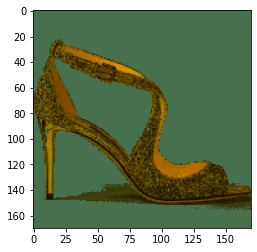

In [42]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

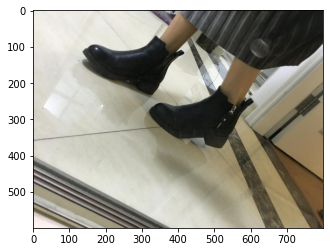

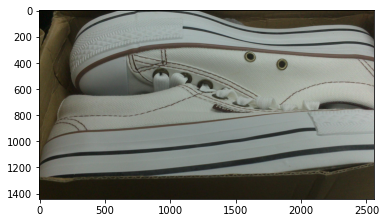

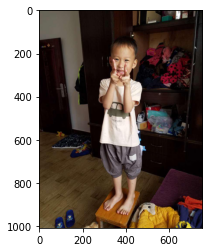

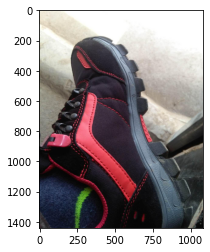

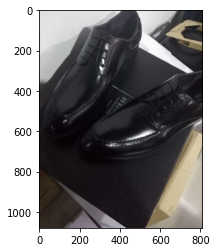

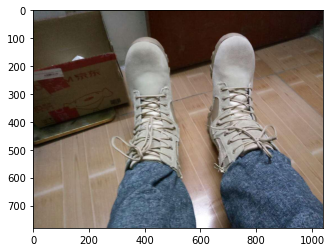

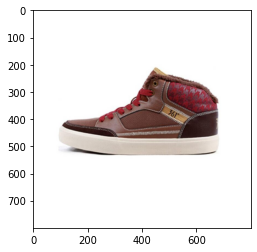

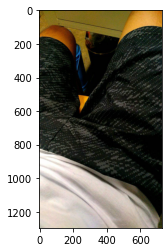

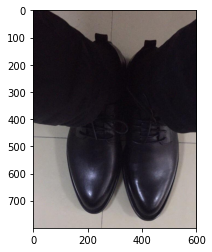

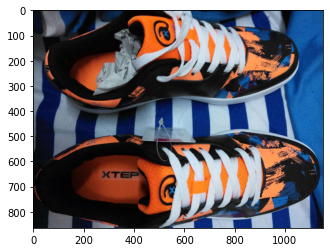

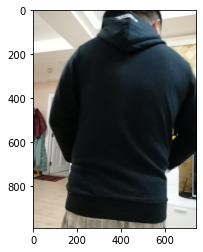

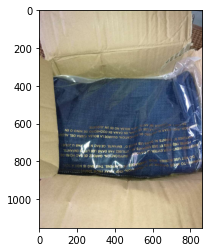

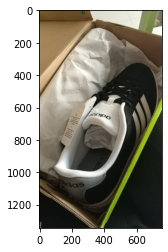

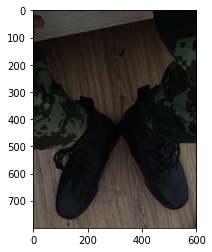

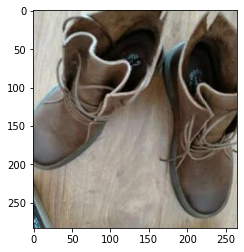

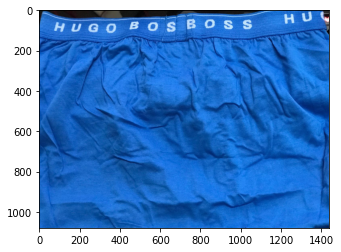

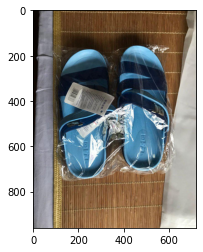

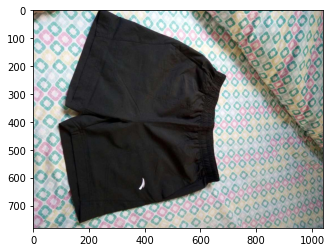

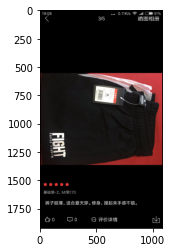

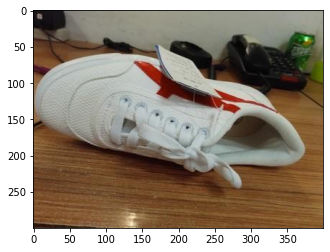

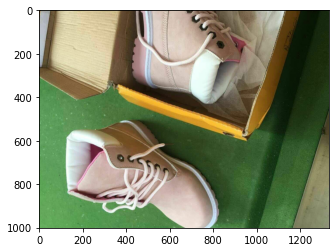

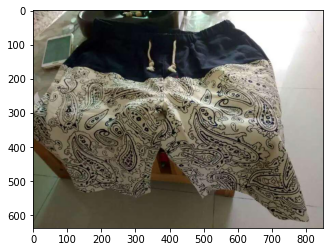

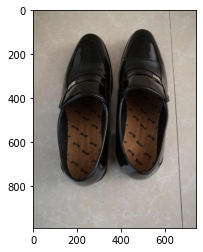

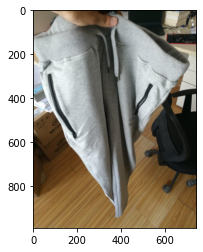

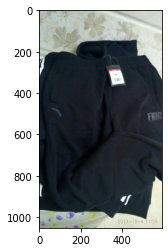

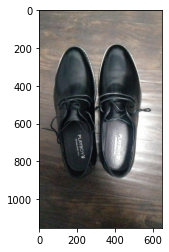

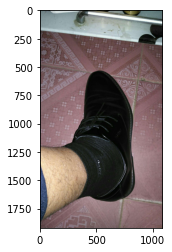

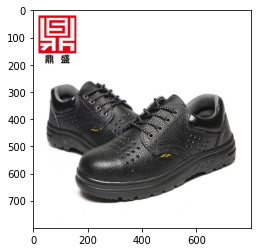

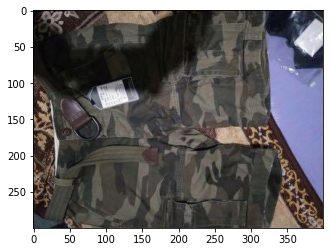

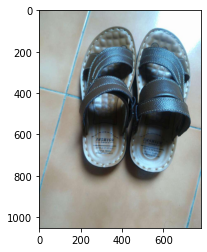

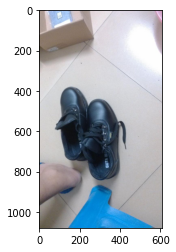

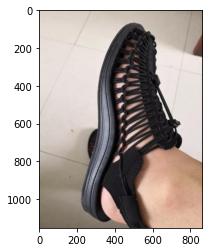

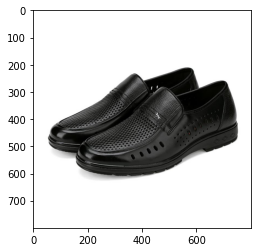

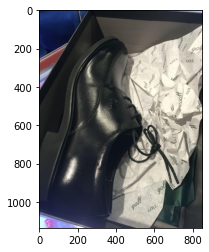

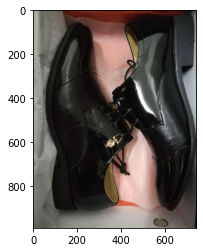

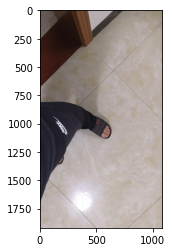

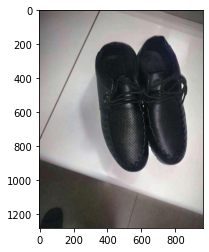

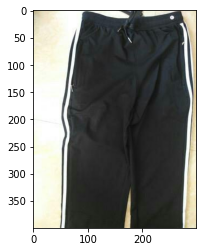

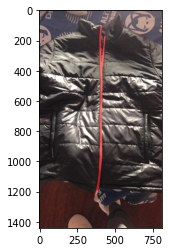

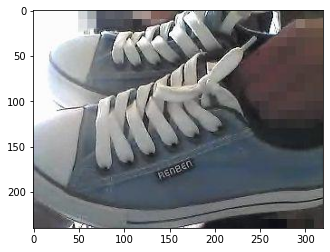

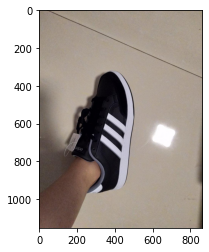

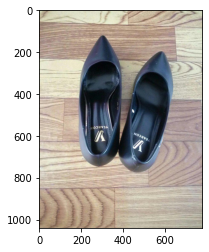

In [43]:
# get images names
names =df_names.loc[indexes, 'name'].values
# show images
for i in range(0,len(names)):
    tmp = cv2.imread('../data/train/' + names[i])
    tmp = cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB)
    plt.imshow(tmp)
    plt.show()

In [8]:
# test delete index
retriever.delete_index('color')